# Table of Contents

* [Honors Physics PHYS1010 - The Mathematics of Life](#Honors-Physics-PHYS1010---The-Mathematics-of-Life)
   * [Introduction](#Introduction)
      * [Benoit Mandelbrot](#Benoit-Mandelbrot)
* [Fractals in Python](#Fractals-in-Python)
   * [Setup the Environment](#1.-Setup-the-Environment)
   * [Generating the Mandelbrot Set](#2.-Generating-the-Mandelbrot-Set)
   * [Generating a Fractal Image](#3.-Generate-a-Fractal-Image)
   * [The Julia Set](#4.-The-Julia-Set)
* [Modeling Biological Organisms](#Modeling-Biological-Organisms)
* [Conclusions](#Conclusions)

# Honors Physics PHYS1010 - The Mathematics of Life

## Introduction

The laws of nature are remarkably simple. In their most compact form, they can be written down on the front of a tee shirt, or on the side of a coffee cup. Yet the universe is complex. Consider the images from our own planet below.

![Coastlines and Rivers](coastlines_rivers.jpg)

![Romanesco Broccoli](romanesco_broccoli.jpg)

The top image of rivers and coastlines are not associated with organisms; they can happen whether living creatures are around or not, simply due to water and time and erosion. The bottom image of romanesco broccoli is a picture of a living organism with biochemistry. Yet they share something in common: a mathematical property known as "self-similarity". This means that "the parts are similar to the whole," and if you zoom in closely on a part it will geometrically resemble the whole of which it is part. 

### Benoit Mandelbrot

It was the mathematician Benoit Mandelbrot who first shed serious and rigorous light on this observed feature of the natural world. Mandelbrot was interested not in the classical geometric shapes - circles, squares, triangles - but in the real shapes found in nature, which are never idealistic but exhibit beauty nonetheless.

He coined the term “fractal” to describe geometric shapes that appear the same no matter how closely you zoom into them. This he did after working with sets of complex numbers, originally the “Julia Set” but later developing his own set (“The Mandelbrot Set”). We will play with those below.

Fractals describe “self-similarity” in nature. Self-similarity is everywhere. Consider the image of a tree and its branches below:

![Branching tree](branching_tree.jpg)

Does this resemble anything else you might have seen in nature? How about the rivers and forks above? How about the human lung's arterial system below? 

![Lung arterial network](lung_arterial_network.jpeg)


Self-similarity is everywhere, whether geological forces or biochemical forces are at work. Self-similarity is found on Mars and Europa. It may be a uniting organizational feature of natural systems, as it seems to be a simple consequence of a singular mathematical concept: a system with inputs whose output is fed back into the system.


# Fractals in Python

Here we will demonstrate how to generate fractal images using the coding language python

## 1. Setup the Environment

Here we import the packages we need from the existing python libraries. Python has extensive libraries of functions that saves us from having to write them ourselves.

In [1]:
#The Python Imaging Library (PIL)
from PIL import Image, ImageDraw

# Basic math and color tools
import math, colorsys, numpy

# Mathematical plotting
import matplotlib as mpl
from matplotlib import colors as mplcolors
import matplotlib.pyplot as plt

# Displaying real graphical images (pictures)
from IPython.display import Image as ipythonImage

import pickle,glob

# Graphical representation library PANDAS
import pandas as pd

# Imports a lot of matplotlib code to run inline
#%pylab inline
%matplotlib notebook
import ipywidgets as widgets

This sets up the colors we want in our fractal image.

How this works:
We are building an array of values that correspond to our colors. Colors are defined in Python as a list of three values corresponding to the percentage of Red, Green, and Blue in that color.
Black is (0.0, 0.0, 0.0) and White is (1.0, 1.0, 1.0)

Feel free to change the colors as you wish. Below, we use color maps defined in MatPlotLib to make a color scale for our images. You can choose any color map you like by string name. The string names are given in:

* https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Below, for the Mandelbrot set we use the diverging color map 'PiYG'. For the Julia Set, we use the color map 'summer'.

## 2. Generating the [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set)

As we covered in the slides, The Mandelbrot Set is the set of complex numbers, C, such that the following equation does not diverge when iterated from $z = 0$:

\begin{split}
z_{n+1}= z_{n}^{2} + c
\end{split}

To determine if the equation is diverging, we need to set up a test.

To do so, we will use a loop and check if the absolute value of $z_{n}$ is larger than a cutoff.

We define a function to do this that accepts an input value for $c$ and returns $-1$ if $c$ is in the Mandelbrot Set and the iteration that diverged if not.

In [2]:
# Perform the Mandelbrot Set test.

divergence_test_value = 2.0

# The mandelbrot_test function takes a test number, "c", and checks if it is in the Mandelbrot set.
# If the Mandelbrot series diverges for "c", it's not in the Mandelbrot set. To help us draw the
# image, return the value of the interation (n) at which the divergence test fails. If it doesn't
# diverge, return -1 to indicate that. Try 100 iterations to see if it diverges; after 100, assume
# it converges.

global mandelbrot_max_iterations
mandelbrot_max_iterations = 100

def mandelbrot_test(c):
    z_n = complex(0,0)
    for n in range(0,mandelbrot_max_iterations):
        z_n = z_n*z_n + c
        if abs(z_n) > divergence_test_value:
            return n
    return -1

Let's use over Mandelbrot test function to check some examples of "c":

In [3]:
test_c = 1
diverges_at = mandelbrot_test(test_c)
print(f"The test number {test_c} diverges at {diverges_at} iterations.")

The test number 1 diverges at 2 iterations.


In [4]:
test_c = 0
diverges_at = mandelbrot_test(test_c)
print(f"The test number {test_c} diverges at {diverges_at}.")

The test number 0 diverges at -1.


In [5]:
test_c = 0.5
diverges_at = mandelbrot_test(test_c)
print(f"The test number {test_c} diverges at {diverges_at} iterations.")

The test number 0.5 diverges at 4 iterations.


In [6]:
test_c = -1
diverges_at = mandelbrot_test(test_c)
print(f"The test number {test_c} diverges at {diverges_at}.")

The test number -1 diverges at -1.


## 3. Generate a Fractal Image

Now that we can determine if a value is in the Mandelbrot Set, let's build the structure of our image. We are going to loop over all the pixels in our image and check if that pixel is in the Mandelbrot Set.  We are using the $x$ and $y$ coordinates to represent the Real and Imaginary parts of the Complex number $z$.

Please be patient while we test all the pixels in the 800x800 grid to see if they are in the Mandelbrot Set...


<IPython.core.display.Javascript object>


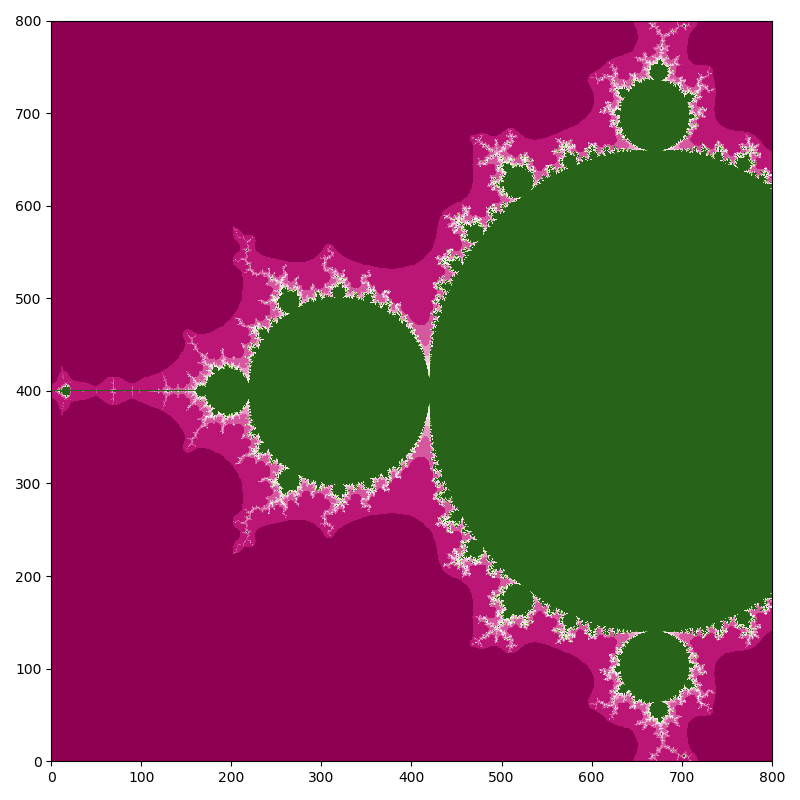

Here is the final image object after testing each pixel:
Save the fractal image to disk...


In [7]:
# Define the physical maximal width and height of the image we will make
x_max = 800 #pixels
y_max = 800 #pixels

# Image step size and grid of x,y coordinates
dy=1
dx=1
y, x = numpy.mgrid[slice(0, y_max + dy, dy),
                   slice(0, x_max + dx, dx)]

# Recenter the cool part of the image
offset=(1.8,1.0) # making these numbers bigger slides the image down and to the right
x_scale = 2.0 # the smaller this is, the more you zoom in on the x-axis
y_scale = 2.0 # the smaller this is, the more you zoom in on the y-axis

# Calculate the numbers we will test using the Mandelbrot Set tester function
z = (x*x_scale/x_max-offset[0]) + 1j*(y*y_scale/y_max-offset[1])

# Create an array of the function in memory to deploy across all z's and compute all results
print(f"Please be patient while we test all the pixels in the {x_max}x{y_max} grid to see if they are in the Mandelbrot Set...")

n = numpy.vectorize(mandelbrot_test)(z)

# Convert the test results to a color scale between 0 and 1 (1 means "in the Mandelbrot set," 
# while [0-1) represents the fraction of total iterations before it diverged!

def ColorValueFromTest(n, max):
    #Checks if we are in the Mandelbrot Set            
    if n == -1: 
        v=1
    #If not, compute the fraction of total iterations    
    else: 
        v=float(n)/float(max)
    return v

# compute the color values from the Mandelbrot tests
v = numpy.vectorize(ColorValueFromTest)(n, mandelbrot_max_iterations)
v = v[:-1, :-1]

# Time to draw!
# Create a colormesh plot to make the final figure
figure, axes = plt.subplots(figsize=(8,8))

color_map = plt.get_cmap('PiYG')
color_levels = mpl.ticker.MaxNLocator(nbins=15).tick_values(v.min(), v.max())
color_scale = mpl.colors.BoundaryNorm(color_levels, ncolors=color_map.N, clip=True)

plot_mandelbrot = plt.pcolormesh(x, y, v, cmap=color_map, norm=color_scale)
plt.tight_layout()

print("Here is the final image object after testing each pixel:")

figure.canvas.draw()
plt.show()


print(f"Save the fractal image to disk...")
fractal_filename = "fractal.png"
figure.savefig(fractal_filename)

## Compare to an animated fractal GIF from the web

These fractal images resemble lakes with bays and rivers and forks and streams. If you could zoom in on one of the bays, you would see that it, close up, looks just like the above image. And so on. And so on. Self-similarity. See the animation below.

This idea is used to generate realistic looking mountain ranges, coastlines, and bodies of water in computer animated graphics in video games and movies. It is considered so effective at mimicking the real world because fractal geometry seems to be the mathematics that explains "natural shapes" found in the real world.

![Zooming on a Mandelbrot Set Fractal Image](fractal_zoom.gif)

## 4. The [Julia Set](https://en.wikipedia.org/wiki/Julia_set)

It turns out that there are more ways to make a fractal. The Julia Set is another such means of defining sequences of numbers. I trust if you are interested in the mathematical details that lead to the code below, you can click on the link above and learn on your own.

We are going to vary some of the parameters and see what happens.

First we open up our value of $z_n$ and redefine our iteration function.

We have also pulled out the functional form that defines our set, this will make it easier to modify this without breaking anything in our iterate function.

Let's define a "$z_n$ operator" that acts on the number, $z_n$, in each iteration to compute the next iteration in the set computation.

### Useful numpy Functions: Call by using numpy.function

Try some of these in the definition of our set and see what happens.

|Trig Functions|Hyperbolic Functions|Exponentials and Logs|
|:---:|:---:|:---:|
|`sin(x)`|`sinh(x)`|`exp(x)`|
|`cos(x)`|`cosh(x)`|`log(x)`|
|`tan(x)`|`tanh(x)`|`log10(x)`|
|`arcsin(x)`|`arcsinh(x)`|`power(x,y)`|
|`arccos(x)`|`arccosh(x)`|`sqrt(x)`|
|`arctan(x)`|`arctanh(x)`||

We've implemented a bunch of these as possible options for you to play with below... see the comments in the code!

In [8]:
def zn_operator(c, z_n):
    # Uncomment one of these to alter the function used in the set iteration - play around!
    # zn_result = z_n*z_n +c # this is what we used in the Mandelbrot Set
    zn_result = numpy.power(z_n,2) + c # vary the power to change the function, e.g. change 2 to 3, etc.
    #zn_result = numpy.sin(z_n) + c
    #zn_result = numpy.cos(z_n) + c
    #zn_result = numpy.tan(z_n) + c
    #zn_result = numpy.asin(z_n) + c
    #zn_result = numpy.acos(z_n) + c
    #zn_result = numpy.atan(z_n) + c
    #zn_result = numpy.sinh(z_n) + c
    #zn_result = numpy.cosh(z_n) + c
    #zn_result = numpy.tanh(z_n) + c
    #zn_result = numpy.asinh(z_n) + c
    #zn_result = numpy.acosh(z_n) + c
    #zn_result = numpy.atanh(z_n) + c
    #zn_result = numpy.exp(z_n) + c
    #zn_result = numpy.log(z_n) + c # natural logarithm
    #zn_result = numpy.log(z_n,10) + c # logarithm base 10; change the base to your liking!
    return zn_result

In [9]:
# Define the Julia Set test function, which employs the zn_operator() defined above

divergence_test_value = 2.0
julia_max_iterations = 100

def julia_test(c, z_n = -2.0**.5):
    for n in range(0,julia_max_iterations):
        z_n = zn_operator(c, z_n)
        if abs(z_n) > divergence_test_value:
            return n
    return -1

Now we open up the value of c to be defined by us and let the pixel location relate to the value of $z_{n}$

Please be patient while we test all the pixels in the 800x800 grid to see if they are in the Julia Set...


<IPython.core.display.Javascript object>


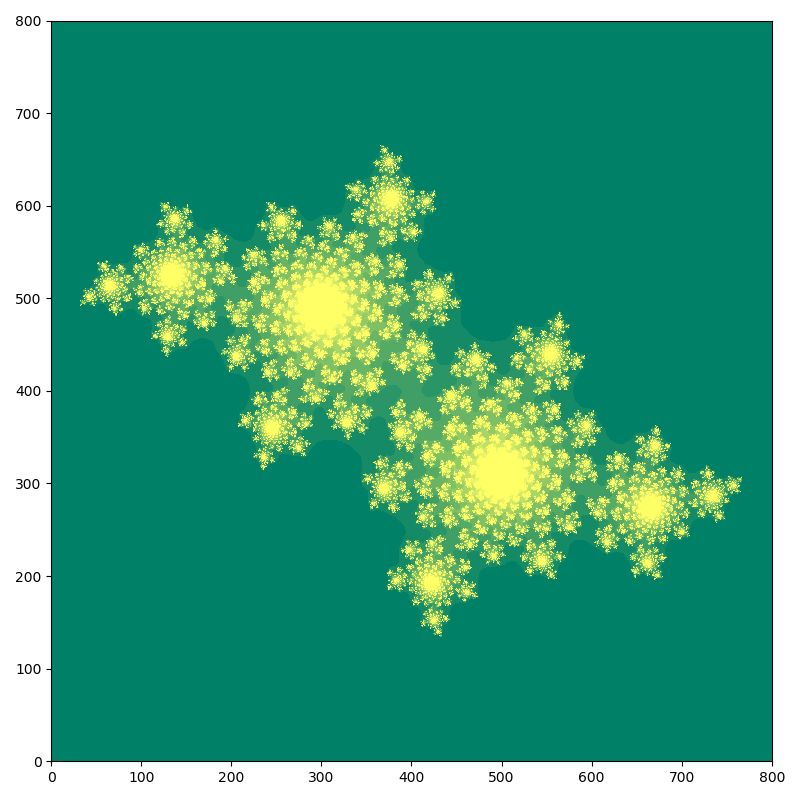

Here is the final image object after testing each pixel:
Save the fractal image to disk...


In [10]:
# Define the physical maximal width and height of the image we will make
x_max = 800 #pixels
y_max = 800 #pixels

# Image step size and grid of x,y coordinates
dy=1
dx=1
y, x = numpy.mgrid[slice(0, y_max + dy, dy),
                slice(0, x_max + dx, dx)]

# Recenter the cool part of the image
offset=(1.5,1.5) # making these numbers bigger slides the image down and to the right
x_scale = 3.0 # the smaller this is, the more you zoom in on the x-axis
y_scale = 3.0 # the smaller this is, the more you zoom in on the y-axis

# Calculate the numbers we will test using the Mandelbrot Set tester function
z = (x*x_scale/x_max-offset[0]) + 1j*(y*y_scale/y_max-offset[1])

# Create an array of the function in memory to deploy across all z's and compute all results
print(f"Please be patient while we test all the pixels in the {x_max}x{y_max} grid to see if they are in the Julia Set...")

# Set the number to test in the Julia Set - you can play with this to change the image!
c_julia = complex(-0.4, 0.6)

n = numpy.vectorize(julia_test)(c_julia, z)

# compute the color values from the Mandelbrot tests
v = numpy.vectorize(ColorValueFromTest)(n, julia_max_iterations)
v = v[:-1, :-1]

# Time to draw!
# Create a colormesh plot to make the final figure
figure, axes = plt.subplots(figsize=(8,8))

color_map = plt.get_cmap('summer')
color_levels = mpl.ticker.MaxNLocator(nbins=15).tick_values(v.min(), v.max())
color_scale = mpl.colors.BoundaryNorm(color_levels, ncolors=color_map.N, clip=True)

plot_julia = plt.pcolormesh(x, y, v, cmap=color_map, norm=color_scale)
plt.tight_layout()

print("Here is the final image object after testing each pixel:")

figure.canvas.draw()
plt.show()


print(f"Save the fractal image to disk...")
fractal_filename = "julia.png"
figure.savefig(fractal_filename)

The default Julia Set output looks a little like Romanesco Broccoli, eh?

# Modeling Biological Organisms

Below, we will create what is known as the "Barnsley Fern". It is so called because this bit of mathematics can create forms similar to this:

![Fern fronds](fern.jpg)

In [11]:
# Define a function for drawing Barnsley's Fern
def BarnsleysFern(f,itt):            
    colname = ["percent","a","b","c","d","e","f"]
    
    fern_structure_frame = pd.DataFrame(data=numpy.array(f), columns = colname)
    print(fern_structure_frame)
    
    
    if itt > 5000:
        itt = 5000
    
    x,y = {0.5,0.0}
    xypts=[]
    print(f"Sum of percentages in your settings: {fern_structure_frame['percent'].sum()}")
    if (1.0 - fern_structure_frame['percent'].sum()) > 1e-10:
        print("Probabilities must sum to 1")
        return
    for i in range(itt):
        rand = (numpy.random.random())
        cond = 0.0
        for j in range(len(f)):
            if  (cond <= rand) and (rand <= (cond+f[j][0])):
                x = f[j][1]*x+f[j][2]*y+f[j][5]
                y = f[j][3]*x+f[j][4]*y+f[j][6]
                xypts.append((x,y))
            cond = cond + f[j][0]
            
    xmax,ymax = max(abs(numpy.transpose(xypts)[0])),max(abs(numpy.transpose(xypts)[1]))
    figure, axes = plt.subplots(figsize=(6,6))
    color = numpy.transpose([[abs(r)/xmax for r in numpy.transpose(xypts)[0]],[abs(g)/ymax for g in numpy.transpose(xypts)[1]],[b/itt for b in range(itt)]])
    
    plt.scatter(numpy.transpose(xypts)[0],numpy.transpose(xypts)[1],alpha=0.5, facecolors=color, edgecolors='none', s=1)
    plt.tight_layout()
    figure.canvas.draw()
    plt.show()


#### For Barnsley's Fern:
Use the following values

|Percent|A|B|C|D|E|F|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0.01|0.0|0.0|0.0|0.16|0.0|0.0|
|0.85|0.85|0.04|-0.04|0.85|0.0|1.60|
|0.07|0.20|-0.26|0.23|0.22|0.0|1.60|
|0.07|-0.15|0.28|0.26|0.24|0.0|0.44|

Of course, this is only one solution so try as changing the values. Some values modify the curl, some change the thickness, others completely rearrange the structure. Because this is a chaotic system, tiny changes to any of these can have radical outcomes on the organic structure you create. Try it below!

   percent     a     b     c     d    e     f
0     0.01  0.00  0.00  0.00  0.16  0.0  0.00
1     0.85  0.85  0.08 -0.08  0.85  0.0  1.60
2     0.07  0.20 -0.26  0.23  0.22  0.0  1.60
3     0.07 -0.15  0.28  0.26  0.24  0.0  0.44
Sum of percentages in your settings: 1.0


<IPython.core.display.Javascript object>


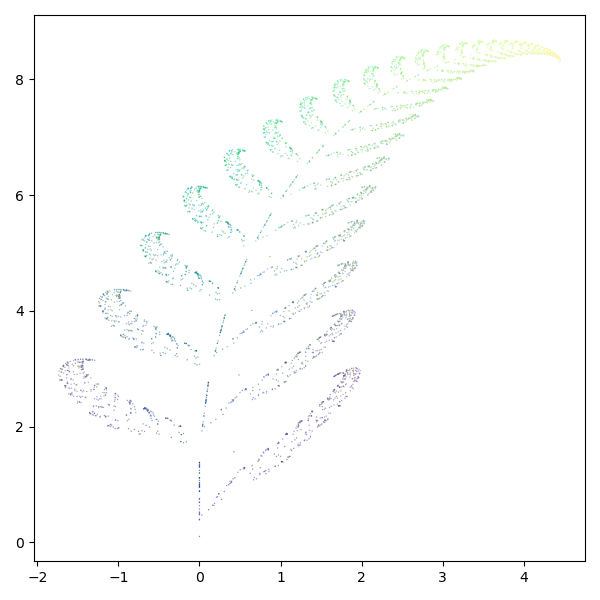

In [12]:
# Define the fern structure and draw one

fern_structure = \
    ((0.01,0.0,0.0,0.0,0.16,0.0,0.0),
     (0.85,0.85,0.08,-0.08,0.85,0.0,1.60),
     (0.07,0.20,-0.26,0.23,0.22,0.0,1.60),
     (0.07,-0.15,0.28,0.26,0.24,0.0,0.44))

BarnsleysFern(fern_structure,5000)

# Conclusions

This is a small taste of fractal geometry, with some exposure to the software you could write (or copy and modify) to play with these ideas. Can fractal geometry help us to understand the possibilities that can exist on worlds we have never visited? What other things could you explore that are also governed by fractal geometry and the mathematics of "deterministic chaos" that overaches all of this?

We invite you to explore this further in concepts like weather and climate change, the structure of biological organisms, and natural and mechanics structures.

* Gleick, James. "Chaos". Penguin Books. 20th Anniversary ed. edition (August 26, 2008). ISBN-10: 0143113453. ISBN-13: 978-0143113454
* Al-Khalili, Jim. "The Secret Life of Chaos". Directed by Nic Stacey. Aired on BBC4. Available from Amazon Streaming/CuriosityStream.

# Acknowledgements

This notebook was written in various pieces by [Eric Godat](https://github.com/egodat) and [Stephen Sekula](https://github.com/stephensekula/), especially with a lot of original development by Eric. It was adapted into the theme of the 2017 Fall Honors Physics Course by Steve.

It was most recently improved in speed and graphics output using numpy and matplotlib for the Spring 2020 Honors Physics class. 